<a href="https://colab.research.google.com/github/ZainaNamugabo/MachineLearning/blob/main/Loan_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import tensorflow as tf


# Change settings to ouput a dataframe
from sklearn import set_config
set_config(transform_output='pandas')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
seg_df =pd.read_csv('/content/drive/MyDrive/cust_seg.csv')
seg_df = seg_df.drop(columns=['Unnamed: 0'])
seg_df= seg_df.set_index('Customer Id')
seg_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [32]:
seg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [33]:
seg_df.duplicated().sum()

np.int64(0)

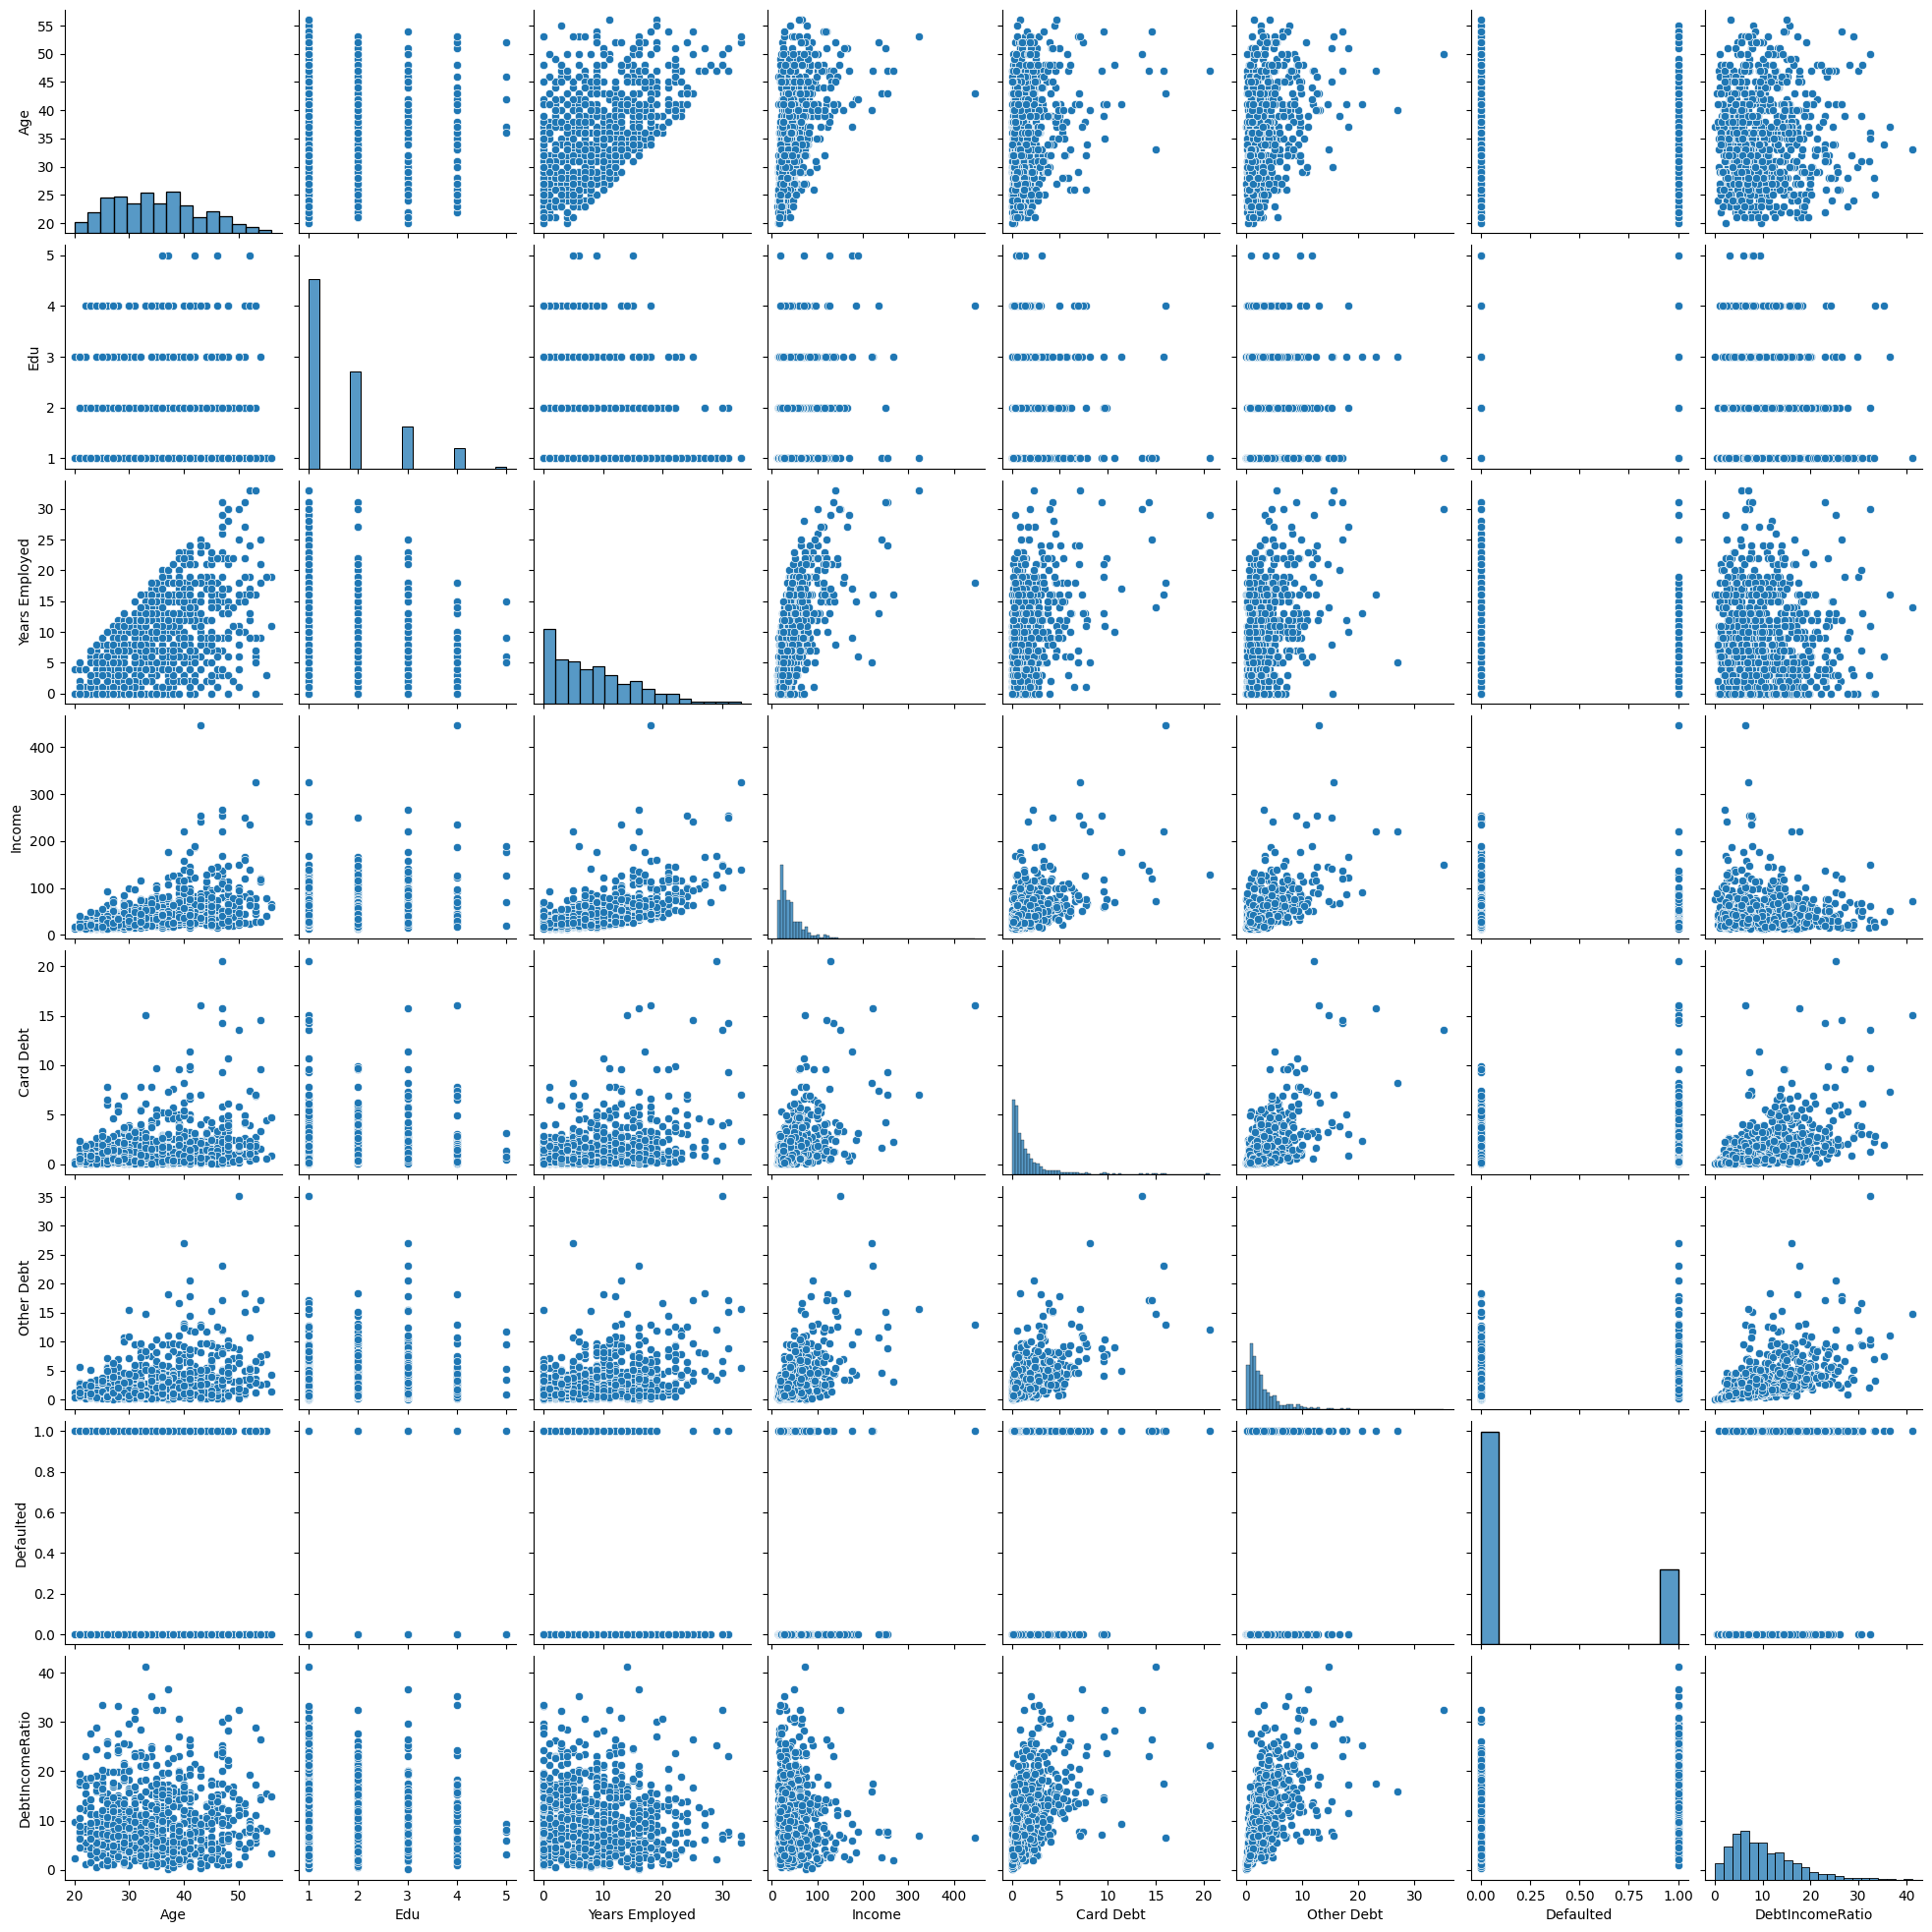

In [34]:
sns.pairplot(seg_df) #visualization of raw dataset
plt.show()

In [35]:
seg_df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [36]:
seg_df.isna().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [37]:
imputer_num = SimpleImputer(strategy='mean')
imputer_num.fit(seg_df)

SimpleImputer()

In [38]:
seg_imputed = imputer_num.transform(seg_df)
seg_imputed.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41.0,2.0,6.0,19.0,0.124,1.073,0.0,6.3
2,47.0,1.0,26.0,100.0,4.582,8.218,0.0,12.8
3,33.0,2.0,10.0,57.0,6.111,5.802,1.0,20.9
4,29.0,2.0,4.0,19.0,0.681,0.516,0.0,6.3
5,47.0,1.0,31.0,253.0,9.308,8.908,0.0,7.2


In [39]:
seg_scaler = StandardScaler()
seg_scaler.fit(seg_imputed)

StandardScaler()

In [40]:
seg_scaled = seg_scaler.transform(seg_imputed)
seg_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.655603,-0.576525
2,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.655603,0.391387
3,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.852167,1.597554
4,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.655603,-0.576525
5,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.655603,-0.442507


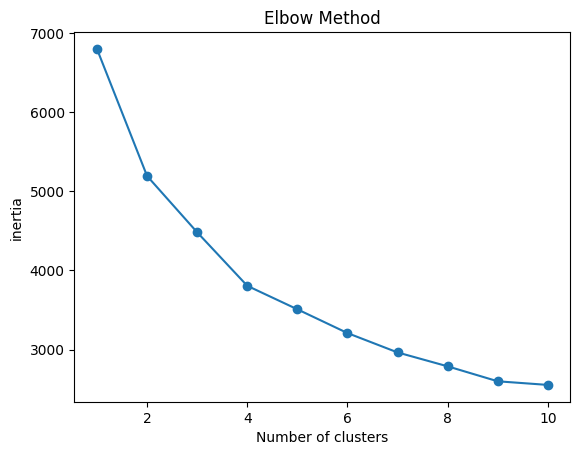

In [41]:
from sklearn.cluster import KMeans
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(seg_scaled)
    inertia.append(kmeans.inertia_)
# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [42]:
# Applying K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(seg_scaled)

KMeans(n_clusters=3)

In [43]:
kmeans.labels_

array([0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0,

In [44]:
kmeans.inertia_

4372.83889728993

<Figure size 800x600 with 0 Axes>

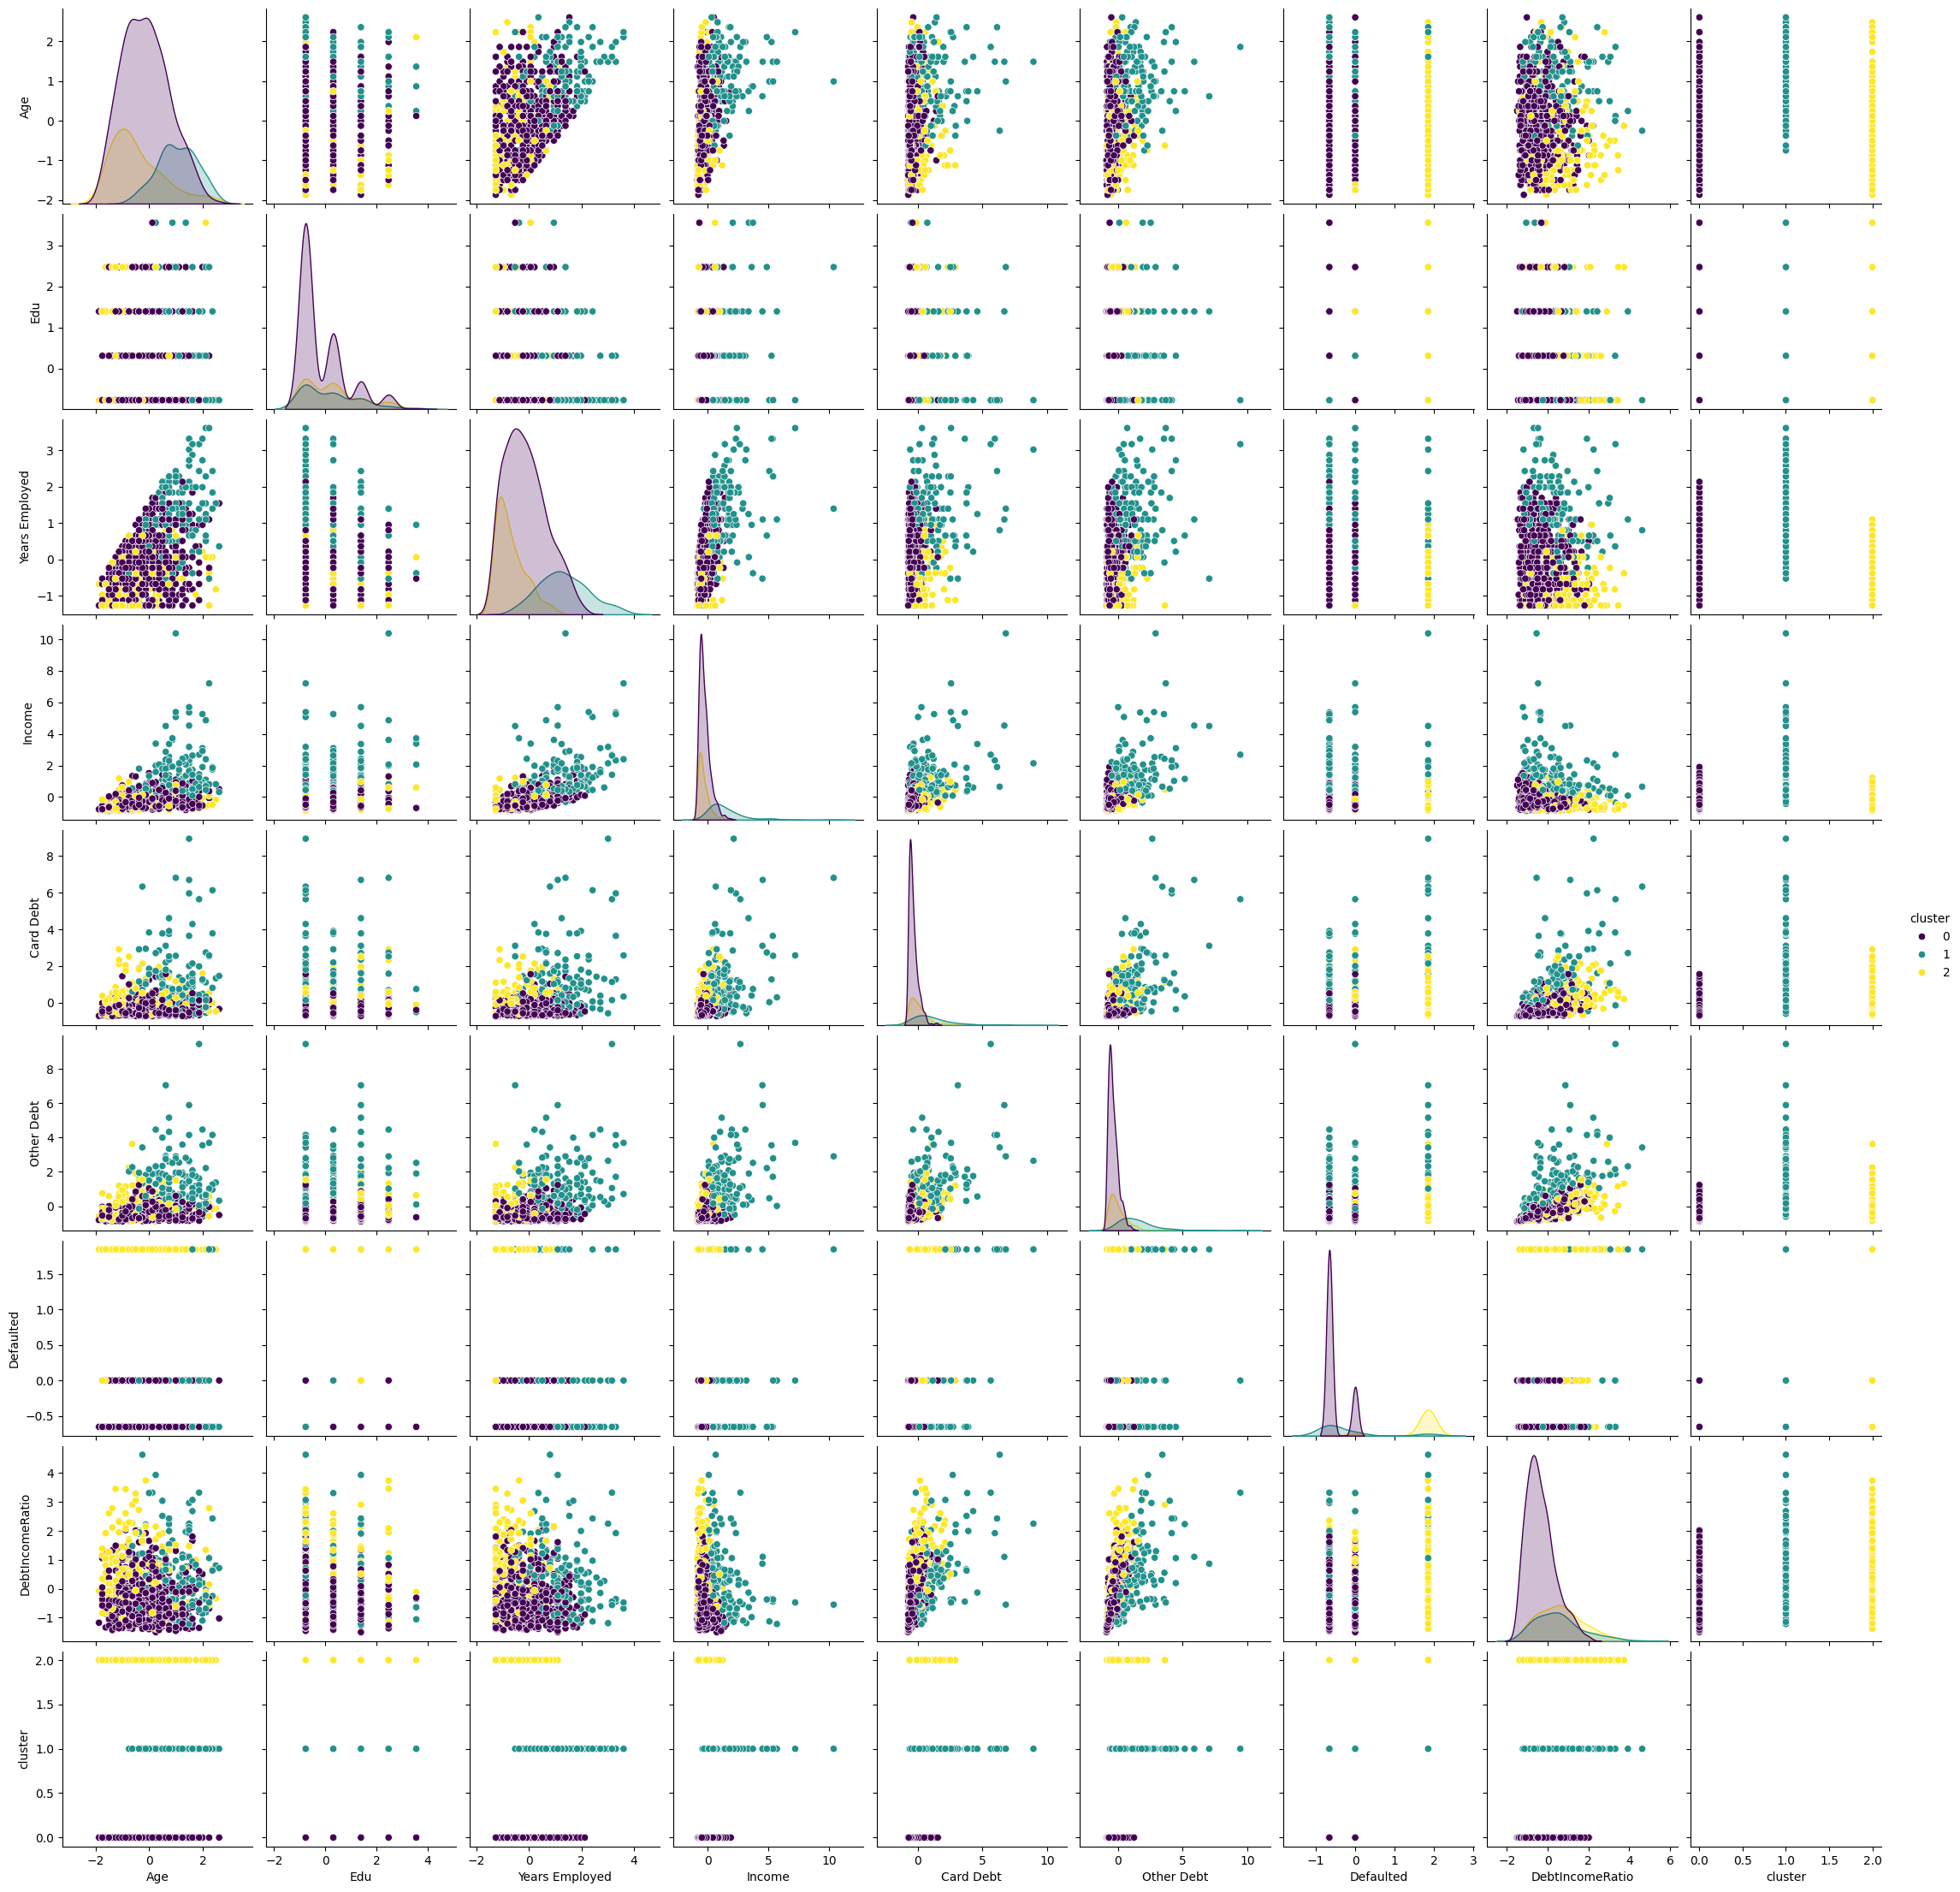

In [45]:
import seaborn as sns
seg_scaled['cluster'] = kmeans.labels_
features = seg_scaled.columns
plt.figure(figsize=(8,6))
sns.pairplot(seg_scaled, vars=features, hue='cluster', palette='viridis')
plt.show()


In [46]:
cluster_summary = seg_scaled.groupby('cluster')[seg_scaled.columns[:-1]].mean() # Select all columns except the last one ('cluster')
print(cluster_summary)

              Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
cluster                                                                        
0       -0.131158 -0.140140       -0.119675 -0.270139  -0.350781   -0.381724   
1        1.047855  0.205794        1.323062  1.474637   1.222530    1.466236   
2       -0.440193  0.246580       -0.689537 -0.370361   0.062222   -0.038879   

         Defaulted  DebtIncomeRatio  
cluster                              
0        -0.518760        -0.359095  
1        -0.190782         0.532326  
2         1.660096         0.627914  


Cluster 0: The Financially Stable Middle Tier

This group represents individuals with average levels of education, income, and debt. They are likely steady earners who manage their finances fairly well, avoiding default on loans. With a slightly negative debt-to-income ratio, they probably focus on staying within their means and maintaining financial stability.

Insight: These individuals could benefit from targeted products such as mid-tier savings accounts or moderate investment opportunities to help them grow their financial resources.

Cluster 1: Struggling or High-Risk Borrowers

Members of this cluster are likely facing financial challenges. They exhibit low income and high levels of debt (as indicated by their positive debt-to-income ratio). The significant "Defaulted" score suggests they are at higher risk of loan default, which may be due to financial instability or limited education leading to fewer employment opportunities.

** Insight:** This cluster represents individuals who would benefit from financial counseling, debt consolidation programs, or flexible loan repayment options to alleviate their financial burden.

** Cluster 2: High Earners and Low Default Risk**

This group consists of individuals with higher income levels, strong education backgrounds, and higher-than-average levels of debt. Despite their debt, they manage it effectively, as indicated by a low "Defaulted" score. These may be affluent professionals or individuals with substantial assets, enabling them to handle financial responsibilities with confidence.

** Insight** : These individuals are ideal candidates for premium banking products or long-term investment options, as they have the financial capacity and stability to engage in high-value services.

Overall Observations
Cluster 0 :appears to represent a stable middle ground, a financially average group balancing income and debt well

Cluster 1 :highlights those who may need support in building financial stability, given their struggles with debt

Cluster 2 : stands out as financially privileged, managing high incomes and debts without significant risk

Recommendations

For Cluster 1 (Struggling or High-Risk Borrowers):

Recommendation: Market low-interest or secured credit cards with features like a lower credit limit and cash-back incentives on essential purchases (e.g., groceries or utilities).

Rationale: These individuals face higher debt burdens and may struggle to manage repayments. Offering secured cards (backed by deposits) can minimize default risks for the company while helping this group rebuild their credit and manage finances better. Educational content on financial management, such as budget tools or workshops, would also resonate with this group.

For Cluster 2 (High Earners and Low Default Risk):

Recommendation: Promote premium or rewards-based credit cards with exclusive benefits such as travel perks, concierge services, or high cash-back rates for luxury spending.

Rationale: This segment consists of financially affluent individuals capable of managing high credit limits. Premium cards with rewards that align with their lifestyle (e.g., travel or dining) will not only attract them but also encourage higher spending, which is profitable for the company

In [50]:
import joblib
from sklearn.cluster import KMeans


# Save the model
joblib.dump(kmeans, "loan_model.pkl")


['loan_model.pkl']